## Intro

![title](./likelihood.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hypotheses(max_num):
    hypotheses = []
#   1 2 -> 1 3 5 7 9
#   1 3 -> 1 4 7
    for i in range(1, max_num):
        for j in range(2, max_num):
            hypotheses.append(np.array([x for x in range(i, max_num, j)]))
#             print('I: %s J: %s' % (i,j))
    
    return hypotheses

def calculate_likelihood(num_arr, hyp_arr, N=1):
    return (1 if all(np.isin(num_arr, hyp_arr)) else 0) / (hyp_arr.size ** N)

def calculate_posterior(num_arr, hyp_arr, sum_likelihood, prior_func, N=1):
    prior = prior_func(hyp_arr)
    probability = calculate_likelihood(num_arr, hyp_arr, N=N)
    return prior * probability / sum_likelihood

def posteriori(numbers, hypotheses, prior_func, N=1):
    sum_likelihood = np.sum([calculate_likelihood(numbers, h) for h in hypotheses])
    return [(calculate_posterior(numbers, h, sum_likelihood, prior_func, N=N), h) for h in hypotheses]

def sort(prob_arr):
    prob_arr.sort(key=lambda column: column[0], reverse=True)
    return prob_arr

## 1. simple likelihood

In [6]:
# hypotheses = generate_hypotheses(20)
max_num = 10
hypotheses = [
    np.array([2, 4, 6, 8, 10]),
    np.array([2, 4, 6, 8, 10, 12, 14]),
    np.array([1, 3, 5, 7, 9]),
    np.array([2, 4, 8, 16, 64]),
    np.array(list(range(2, max_num, 2))),
    np.array(list(range(1, max_num, 1))),
    np.array(list(range(1, max_num, 2)))
]

numbers = np.array([2,4,8])

def likelihoods_and_hypotheses(numbers, hypotheses):
    return [(calculate_likelihood(numbers, h), h) for h in hypotheses]

likelihood_hypo_arr = likelihoods_and_hypotheses(numbers, hypotheses)
sorted_prob = sort(likelihood_hypo_arr)
for pr,hy in sorted_prob:
    print('Chance: %s Hypotheses: %s' % (pr, hy))

Chance: 0.25 Hypotheses: [2 4 6 8]
Chance: 0.2 Hypotheses: [ 2  4  6  8 10]
Chance: 0.2 Hypotheses: [ 2  4  8 16 64]
Chance: 0.14285714285714285 Hypotheses: [ 2  4  6  8 10 12 14]
Chance: 0.1111111111111111 Hypotheses: [1 2 3 4 5 6 7 8 9]
Chance: 0.0 Hypotheses: [1 3 5 7 9]
Chance: 0.0 Hypotheses: [1 3 5 7 9]


## 2. simple posterior

In [126]:
def prior_even(numbers):
    return np.count_nonzero(numbers % 2 == 0) / numbers.size

numbers = np.array([2,4])
hypo_arr = generate_hypotheses(10)

res = posteriori(numbers, hypo_arr, prior_even)
sorted_prob = sort(res)
for pr, hyp in sorted_prob:
    print('Probability: %s Hypotheses: %s' % (pr, hyp))

Probability: 1.0 Hypotheses: [2 4 6 8]
Probability: 0.0 Hypotheses: [1 3 5 7 9]
Probability: 0.0 Hypotheses: [1 4 7]
Probability: 0.0 Hypotheses: [1 5 9]
Probability: 0.0 Hypotheses: [1 6]
Probability: 0.0 Hypotheses: [1 7]
Probability: 0.0 Hypotheses: [1 8]
Probability: 0.0 Hypotheses: [1 9]
Probability: 0.0 Hypotheses: [1]
Probability: 0.0 Hypotheses: [2 5 8]
Probability: 0.0 Hypotheses: [2 6]
Probability: 0.0 Hypotheses: [2 7]
Probability: 0.0 Hypotheses: [2 8]
Probability: 0.0 Hypotheses: [2 9]
Probability: 0.0 Hypotheses: [2]
Probability: 0.0 Hypotheses: [2]
Probability: 0.0 Hypotheses: [3 5 7 9]
Probability: 0.0 Hypotheses: [3 6 9]
Probability: 0.0 Hypotheses: [3 7]
Probability: 0.0 Hypotheses: [3 8]
Probability: 0.0 Hypotheses: [3 9]
Probability: 0.0 Hypotheses: [3]
Probability: 0.0 Hypotheses: [3]
Probability: 0.0 Hypotheses: [3]
Probability: 0.0 Hypotheses: [4 6 8]
Probability: 0.0 Hypotheses: [4 7]
Probability: 0.0 Hypotheses: [4 8]
Probability: 0.0 Hypotheses: [4 9]
Probabil

## 4. MLE MAP

[nan, 0.0, nan, nan, 0.0, 1.0, nan, 1.0, 1.0, 1.0, nan, 0.0, nan, nan, 0.0, 1.0, nan, 1.0, 1.0, 1.0, nan, 0.0, nan, nan, 0.0, 1.0, nan, nan, 1.0, 1.0, nan, 0.0, nan, nan, 0.0, 1.0, nan, 1.0, 1.0, 1.0, nan, 0.0, nan, nan, 0.0]
0.04


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


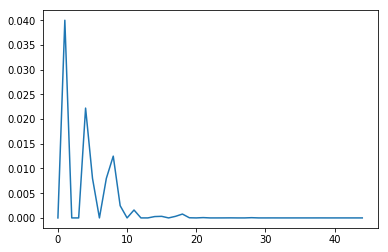

In [114]:
max_num = 10
hypotheses = np.array([
    [2, 4, 6, 8, 10],
    [1, 3, 5, 7, 9],
    [2, 4, 8, 16, 64],
    list(range(2, max_num, 2)),
    list(range(1, max_num, 1))
])

likelihood_arr = []
posterior_arr = []
numbers = np.array(list(range(1, max_num)))

for number in numbers:
    for hyp in hypotheses:
        likelihood = calculate_likelihood([number], np.array(hyp), N=number)
#         posterior_arr.append(res_posterior / hypotheses.size)
        likelihood_arr.append(likelihood / hypotheses.size)
#         res_posterior = posteriori(numbers, hypotheses, prior_even, N=number)
        res_posterior = posteriori([number], np.array(hyp), prior_even, N=number)
        posterior_arr.append(max(res_posterior))

post_res = []
for i,j in posterior_arr:
    post_res.append(i)
print((post_res))
print(max(likelihood_arr))

plt.plot(likelihood_arr)
# plt.plot(post_res)
plt.show()